In [14]:
#import all necessary libraries
import nltk
import sys
import matplotlib.pyplot as plt
from textblob import TextBlob
import tweepy
import numpy as np
%matplotlib inline

In [15]:
#defining a percentage function
def percentage(part,whole):
    return 100*(part/whole)

In [16]:
#refering to all the api information
consumerkey='PRnQ0lIdrGKh05qM02H4ZtFK2'
consumersecret='iyZqZHHRXYLDKGQGcpo3aqulnarKy2IvdVPpLD0uta9OovINGK'
accesstoken='57010702-3TEHulRkZ3HEfQ4jSjJfOfWNJ6mwY6RAUoUSywcQB'
accesstokensecret='B1ppEAvmB2x2QGoJwrI76HVBIQrxRVh11IzwocGvlmKoO'

In [17]:
#setting up connection with the api
auth = tweepy.OAuthHandler(consumerkey, consumersecret)
auth.set_access_token(accesstoken, accesstokensecret)
api = tweepy.API(auth)

In [18]:
# Search for the Term and define number of tweets #
searchTerm = input("Enter Keyword/Tag to search about: ")
NoOfTerms = int(input("Enter how many tweets to search: "))

#getting no. of tweets and seach term together
tweets = tweepy.Cursor(api.search, q=searchTerm).items(NoOfTerms)

#defining variables
positive=0
negative=0
neutral=0
polarity=0

#defining conditions for the values of the variables
for tweet in tweets:
    analysis=TextBlob(tweet.text)
    polarity+=analysis.sentiment.polarity
    
    if (analysis.sentiment.polarity == 0):
        neutral+=1
    elif (analysis.sentiment.polarity > 0):
        positive+=1
    elif(analysis.sentiment.polarity < 0):
        negative+=1
    
    
 # Generate the percentages using previously created function percentage #   
positive=percentage(positive,NoOfTerms)
negative=percentage(negative,NoOfTerms)
neutral=percentage(neutral,NoOfTerms)

positive=format(positive,'.2f')
negative=format(negative,'.2f')
neutral=format(neutral,'.2f')















Enter Keyword/Tag to search about: trump
Enter how many tweets to search: 300


(-1.110283975478645,
 1.1151481257498035,
 -1.1247112433390614,
 1.1011767258732887)

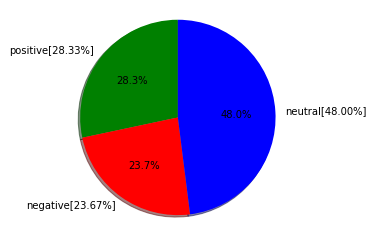

In [19]:
#printing the pie chart to see the results


labels = ['positive['+str(positive)+'%]','negative['+str(negative)+'%]','neutral['+str(neutral)+'%]']#defining labels
sizes = [positive,negative,neutral] #defining the sizes on pie chart
color=['green','red','blue'] #defining colors


fig, ax = plt.subplots() #creating a figure for the pie chart
ax.pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True,colors=color,startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.















